# Hierarchical Clustering

## Importing the libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [17]:
dataset = pd.read_csv(r"C:\Users\Admin\Downloads\Synthetic_Online_Retail.csv")

In [18]:
dataset.shape

(1000, 6)

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TransactionID       1000 non-null   int64  
 1   CustomerSegment     1000 non-null   object 
 2   ProductCategory     1000 non-null   object 
 3   PurchaseAmount ($)  1000 non-null   float64
 4   Quantity            1000 non-null   int64  
 5   PurchaseDate        1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [20]:
X = dataset.iloc[:,[3,4]].values

In [21]:
print(X)

[[525.95   4.  ]
 [285.85   9.  ]
 [301.59   7.  ]
 ...
 [954.78   8.  ]
 [918.93   5.  ]
 [ 51.76   2.  ]]


### Using the dendrogram to find the optimal number of clusters

Text(0, 0.5, 'Euclidian Distance')

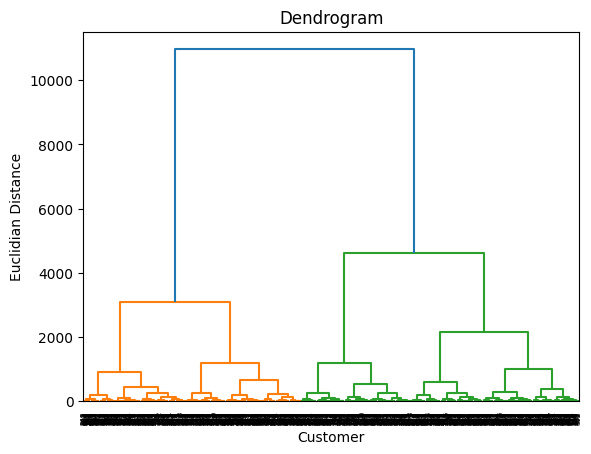

In [22]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.title("Dendrogram")
plt.xlabel("Customer")
plt.ylabel("Euclidian Distance")

## Training the Hierarchical Clustering model on the dataset

In [23]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering (n_clusters = 5, linkage = 'ward')
y_hc = hc.fit_predict(X)

In [24]:
print(y_hc)

[2 3 3 3 4 4 1 1 2 0 0 3 1 2 3 3 2 4 0 1 2 0 1 0 1 1 4 4 3 1 2 4 1 1 1 3 1
 2 1 4 3 3 2 4 3 2 3 1 2 0 0 0 2 0 0 1 1 2 1 0 2 2 2 3 2 3 4 0 0 0 3 2 0 1
 3 0 4 0 2 4 0 0 3 0 0 3 3 2 4 2 0 0 1 2 1 3 2 2 3 2 2 0 3 4 1 3 3 0 4 3 1
 3 3 2 1 2 2 1 0 1 0 4 2 3 1 0 0 2 3 2 0 0 0 0 2 4 1 1 0 2 0 3 2 0 0 1 2 2
 0 3 1 0 3 0 2 0 1 1 4 3 1 2 3 2 0 0 4 3 2 3 1 1 1 3 0 2 0 0 2 2 1 0 3 0 1
 4 1 1 2 2 3 2 2 2 1 1 4 4 4 0 0 4 4 0 1 0 3 4 0 0 3 4 3 4 2 0 1 0 1 2 1 0
 2 0 0 2 0 2 0 3 4 2 2 2 1 3 4 1 4 2 2 4 2 0 0 1 3 4 3 2 0 0 1 1 4 2 4 2 2
 0 2 4 1 0 4 2 2 0 3 3 3 4 4 2 1 3 3 4 0 3 0 0 1 3 2 0 4 3 4 3 0 2 0 2 3 1
 0 4 0 3 3 1 3 0 3 0 0 2 0 0 4 3 0 3 2 3 2 0 2 3 2 1 2 3 3 3 0 0 4 3 2 2 2
 0 1 0 4 4 4 2 0 3 2 3 1 3 3 3 3 2 4 4 1 1 1 0 4 0 0 2 3 0 0 0 1 0 0 3 3 1
 0 2 4 1 2 1 0 3 3 1 0 0 3 0 0 1 2 2 4 3 0 0 3 2 3 0 2 1 1 1 4 3 4 0 4 2 0
 4 1 3 1 0 2 2 2 1 1 4 3 1 0 1 3 0 4 3 3 3 0 0 0 2 0 4 3 1 1 3 4 1 1 2 0 2
 2 2 3 1 1 0 0 0 1 4 2 3 2 3 2 4 1 1 1 3 2 4 1 0 3 0 2 3 3 0 3 1 3 4 2 1 0
 1 2 1 1 0 0 3 2 0 0 2 0 

## Visualising the clusters

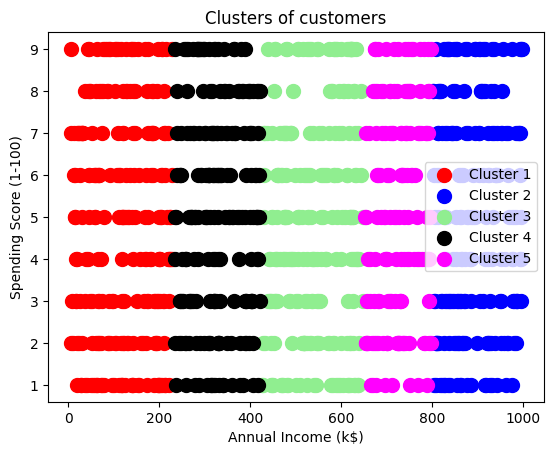

In [25]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'lightgreen', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Internal Evaluation of Cluster
### DB Score (lower is better)

In [12]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X,y_hc)

np.float64(0.5033190522483579)

## External Evaluation
### Homogenity Score (higher is better)

In [15]:
y_pred = hc.predict(X)

AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'